## Matplotlib exercise

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

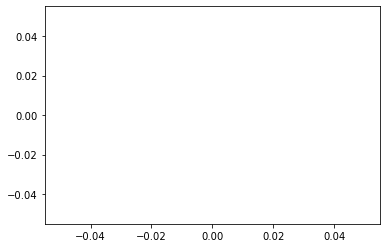

In [3]:
plt.plot();

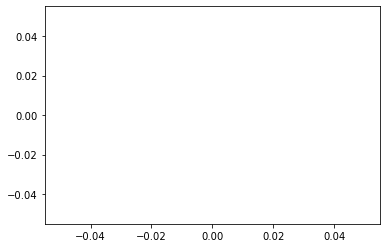

In [5]:
# or
plt.plot()
plt.show()

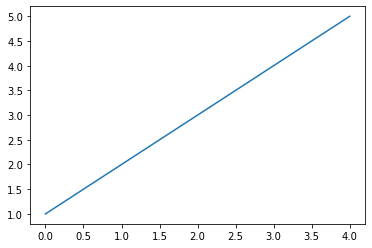

In [6]:
plt.plot([1,2,3,4,5]);

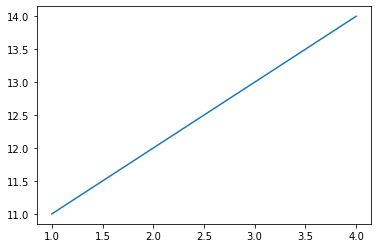

In [7]:
x = [1,2,3,4]
y =[11,12,13,14]
plt.plot(x,y);

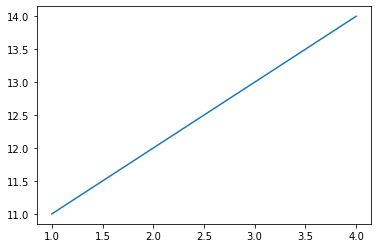

In [15]:
# 1. create a plot with OO version
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x,y);

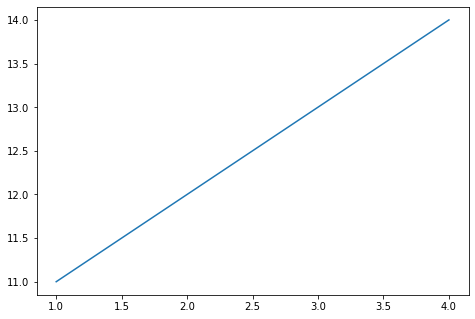

In [16]:
# 2. another method
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

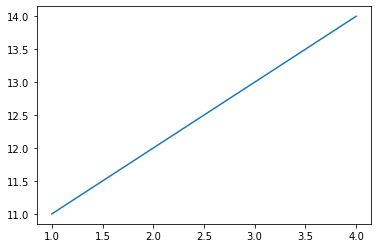

In [17]:
# 3. easier and more robust -- recommend using this
fig, ax = plt.subplots()
ax.plot(x,y);

<img src='matplotlib-anatomy-of-a-plot.png'/>

## Matplotlib example workflow

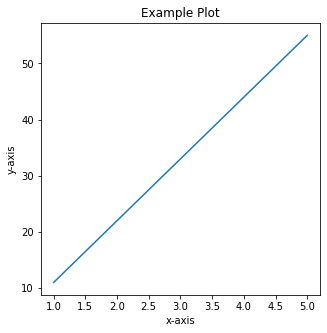

In [18]:
# 0. import matplotlib and get it ready for plotting
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1,2,3,4,5]
y = [11,22,33,44,55]

# 2. Setup plot
# Signature:
# plt.subplots(
#     nrows=1,
#     ncols=1,)
fig, ax = plt.subplots(figsize=(5,5))

# 3. Plot Data
ax.plot(x,y)

# 4. Customize plot
ax.set(title='Example Plot',
       xlabel='x-axis',
       ylabel='y-axis')

# 5. Save and show 
fig.savefig('example-mat-plot.png')

## Make figures with Numpy arrays
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [19]:
import numpy as np

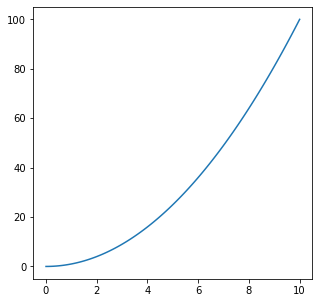

In [21]:
x = np.linspace(0,10,100)

#  Line plot the data
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(x, x**2);

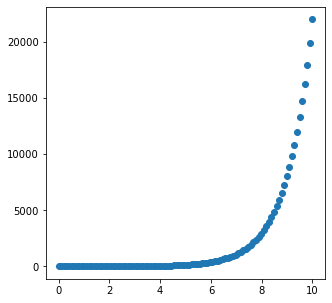

In [23]:
# Scatter plot of the data
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x, np.exp(x));

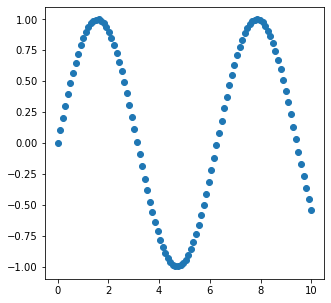

In [24]:
# Another scatter
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x, np.sin(x));

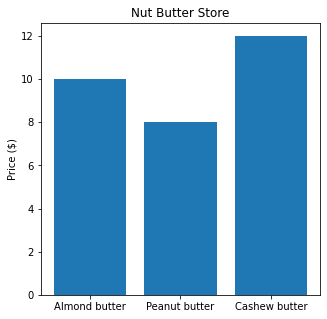

In [27]:
# Make a plot from dictionary
nut_butter_prices = {
    'Almond butter':10,
    'Peanut butter':8,
    'Cashew butter': 12
}
fig, ax = plt.subplots(figsize=(5,5))
ax.set(title='Nut Butter Store',
       ylabel='Price ($)')
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());

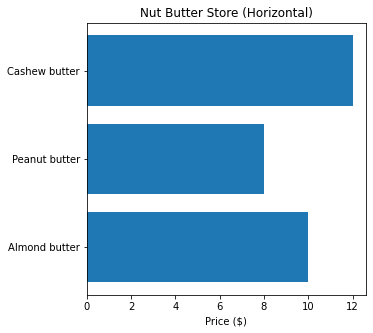

In [33]:
# Make a horizontal bar
fig, ax = plt.subplots(figsize=(5,5))
ax.set(title='Nut Butter Store (Horizontal)',
       xlabel='Price ($)')
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

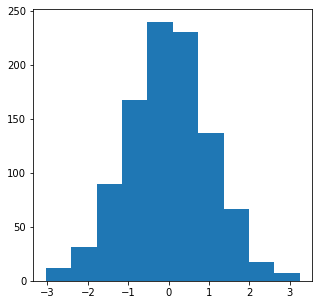

In [37]:
x = np.random.randn(1000)

# 
fig, ax = plt.subplots(figsize=(5,5))

ax.hist(x);

## Two options for subplots

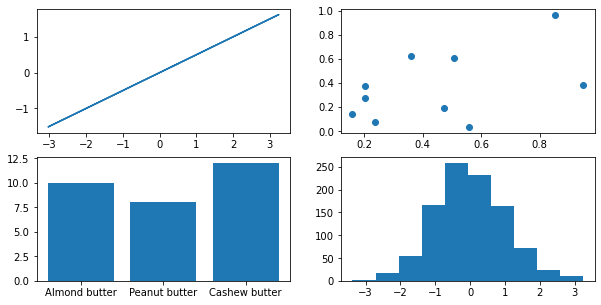

In [40]:
# option1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,5))

ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(),nut_butter_prices.values())
ax4.hist(np.random.randn(1000))

plt.show()

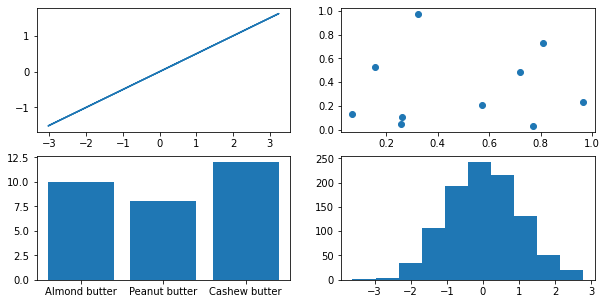

In [41]:
# option2
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,5))

ax[0,0].plot(x,x/2)
ax[0,1].scatter(np.random.random(10),np.random.random(10))
ax[1,0].bar(nut_butter_prices.keys(),nut_butter_prices.values())
ax[1,1].hist(np.random.randn(1000))

plt.show()

## Plotting from pandas DataFrames

In [73]:
import pandas as pd

car_sales = pd.read_csv('car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


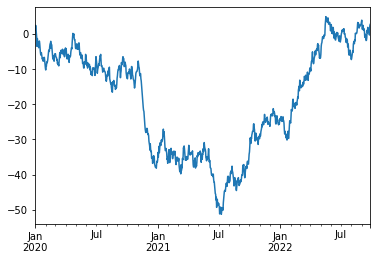

In [74]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()
ts.plot();

In [75]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]','',regex=True)


car_sales['Price'] = car_sales['Price'].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [76]:
car_sales['Sales Date'] = pd.date_range('1/1/2022', periods=len(car_sales))

car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date
0,Toyota,White,150043,4,4000,2022-01-01
1,Honda,Red,87899,4,5000,2022-01-02
2,Toyota,Blue,32549,3,7000,2022-01-03
3,BMW,Black,11179,5,22000,2022-01-04
4,Nissan,White,213095,4,3500,2022-01-05
5,Toyota,Green,99213,4,4500,2022-01-06
6,Honda,Blue,45698,4,7500,2022-01-07
7,Honda,Blue,54738,4,7000,2022-01-08
8,Toyota,White,60000,4,6250,2022-01-09
9,Nissan,White,31600,4,9700,2022-01-10


In [79]:
type(car_sales['Price'][0])

str

In [85]:
car_sales['Total Sales'] = car_sales['Price'].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total sales,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450,76450


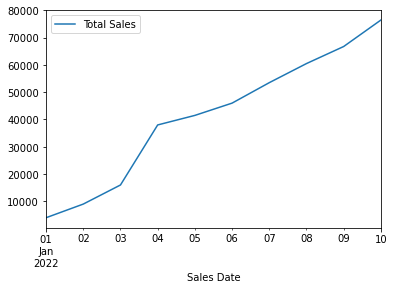

In [86]:
car_sales.plot(x='Sales Date', y='Total Sales');

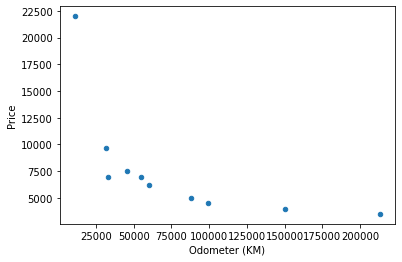

In [87]:
car_sales['Price'] = car_sales['Price'].astype(int)
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter');

In [88]:
x = np.random.rand(10,4)
x

array([[0.08489128, 0.66743444, 0.95855604, 0.34095374],
       [0.81527465, 0.72140537, 0.2917678 , 0.18273446],
       [0.39955612, 0.02066663, 0.03207727, 0.14636368],
       [0.00641966, 0.59993434, 0.91373873, 0.728578  ],
       [0.04687478, 0.43481086, 0.85284297, 0.01657209],
       [0.26376085, 0.32383902, 0.61084129, 0.45848758],
       [0.14919027, 0.40980174, 0.96093959, 0.25375867],
       [0.40212357, 0.0270694 , 0.49173055, 0.04334699],
       [0.34757749, 0.32200864, 0.13634055, 0.67832698],
       [0.53590172, 0.51175426, 0.86971214, 0.35266856]])

In [89]:
df=pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.084891,0.667434,0.958556,0.340954
1,0.815275,0.721405,0.291768,0.182734
2,0.399556,0.020667,0.032077,0.146364
3,0.006420,0.599934,0.913739,0.728578
4,0.046875,0.434811,0.852843,0.016572
5,0.263761,0.323839,0.610841,0.458488
6,0.149190,0.409802,0.960940,0.253759
7,0.402124,0.027069,0.491731,0.043347
8,0.347577,0.322009,0.136341,0.678327
9,0.535902,0.511754,0.869712,0.352669


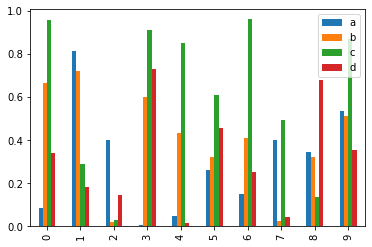

In [91]:
df.plot.bar();

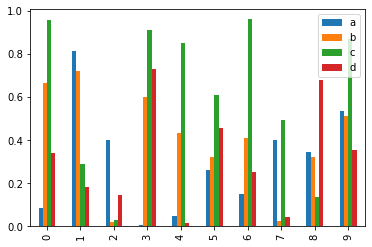

In [92]:
df.plot(kind='bar');

In [93]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total sales,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450,76450


In [95]:
car_sales.drop(['Total sales'],axis=1,inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


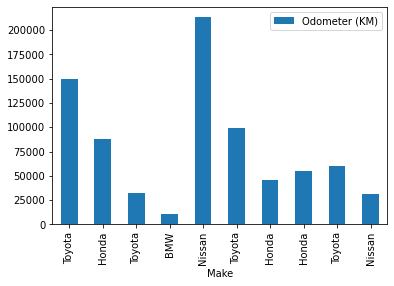

In [96]:
car_sales.plot(x='Make', y='Odometer (KM)', kind = 'bar');

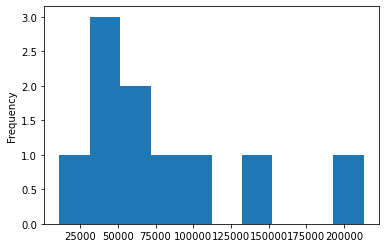

In [97]:
car_sales['Odometer (KM)'].plot.hist();

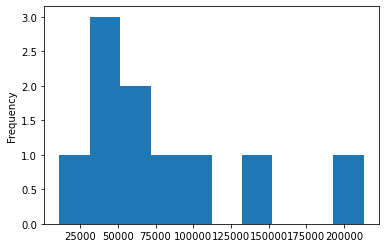

In [98]:
car_sales['Odometer (KM)'].plot(kind='hist');

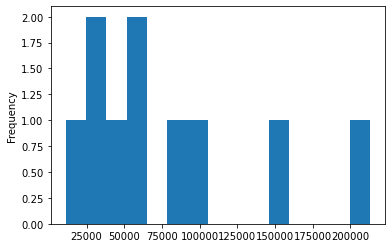

In [100]:
car_sales['Odometer (KM)'].plot.hist(bins=15);

In [101]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


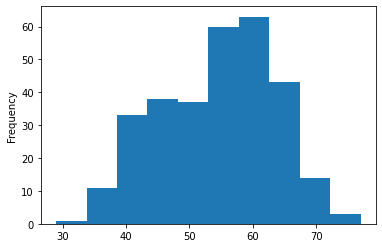

In [104]:
# creater a histogram of age
heart_disease['age'].plot.hist();

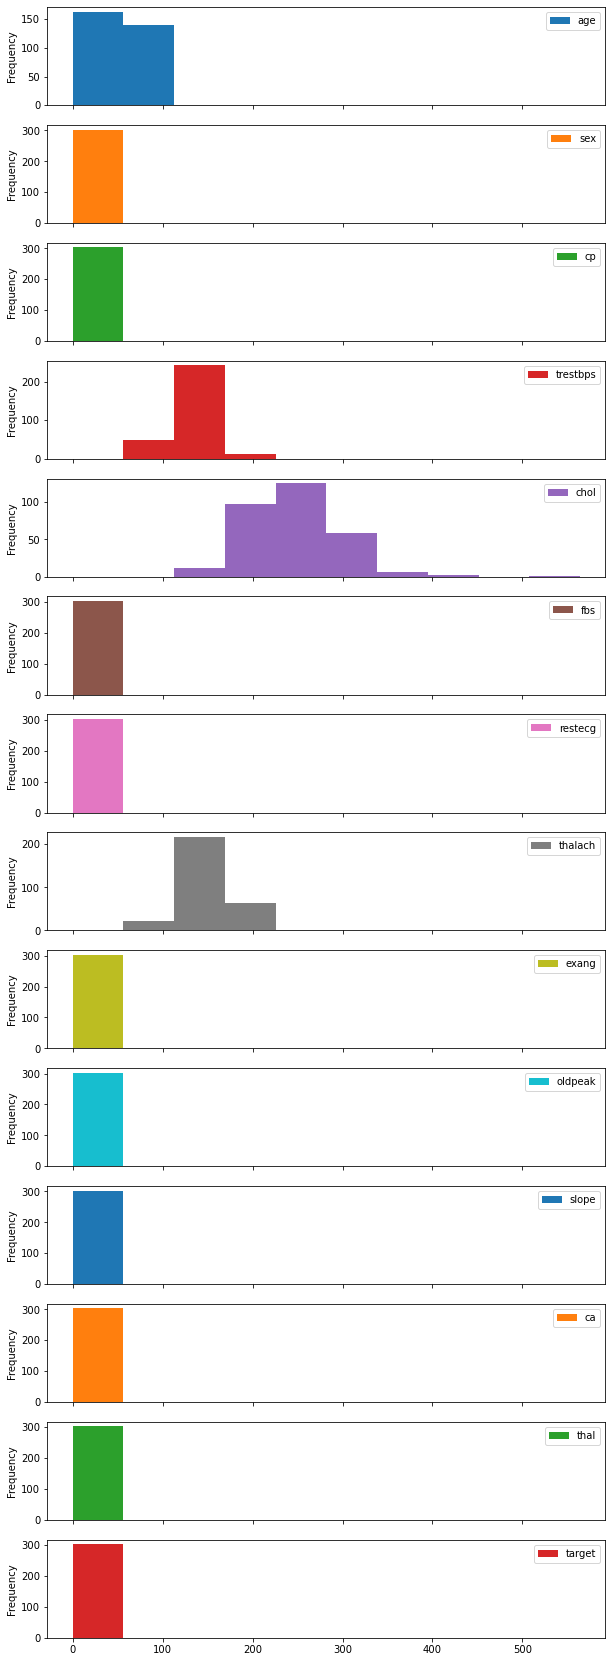

In [105]:
heart_disease.plot.hist(subplots=True, figsize=(10,30));

### Which method to use? (pyplot vs matplotlib OO method)
* When plotting something quickly, okay to use the pyplot method
* when plotting something more advanced, use OO method



In [106]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [107]:
over_50 = heart_disease[heart_disease['age']>50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


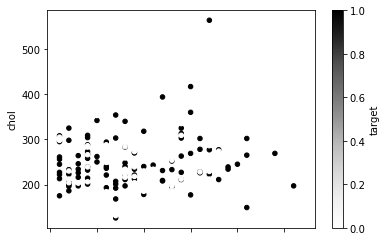

In [108]:
# pyplot
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target');

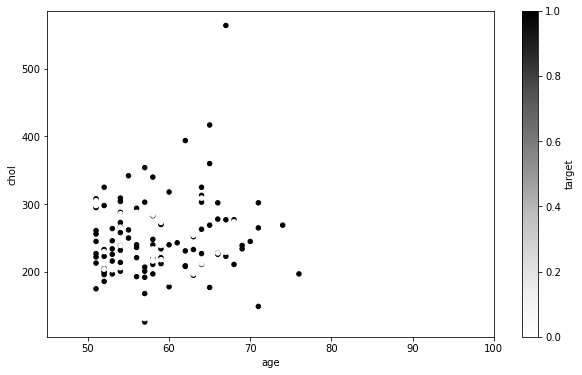

In [110]:
# combine OO method
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax)

ax.set_xlim([45,100]);


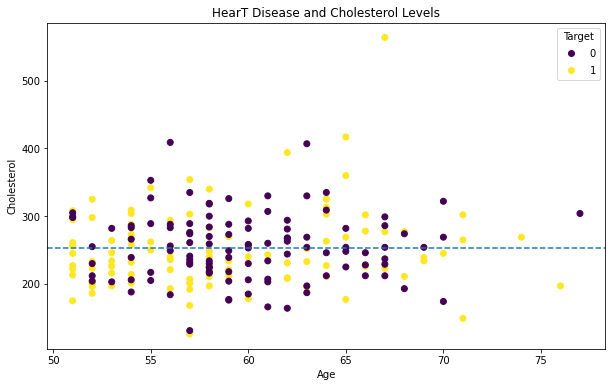

In [113]:
# OO method
fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x=over_50['age'],
           y=over_50['chol'],
           c=over_50['target'])

ax.set(title='HearT Disease and Cholesterol Levels',
       xlabel='Age',
       ylabel='Cholesterol')

ax.legend(*scatter.legend_elements(),title='Target');

ax.axhline(over_50['chol'].mean(),
           linestyle='--');

In [114]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


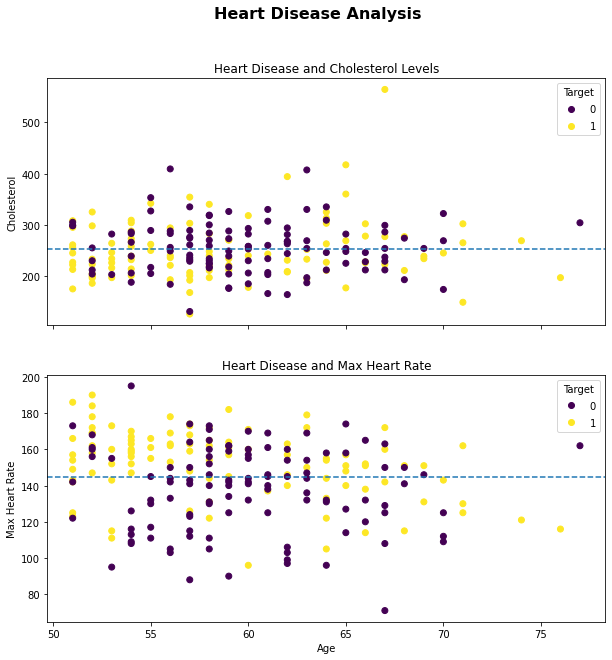

In [123]:
fig,(ax0,ax1) = plt.subplots(figsize=(10,10),
                             nrows=2,
                             ncols=1,
                             sharex=True)

# age vs cholesterol
scatter1 = ax0.scatter(x=over_50['age'],
            y=over_50['chol'],
            c=over_50['target']);

ax0.set(title='Heart Disease and Cholesterol Levels',
        ylabel='Cholesterol')

ax0.legend(*scatter1.legend_elements(),title='Target')
ax0.axhline(y=over_50['chol'].mean(),
            linestyle='--');

# age vs
scatter2= ax1.scatter(x=over_50['age'],
                      y=over_50['thalach'],
                      c=over_50['target'])

ax1.set(title='Heart Disease and Max Heart Rate',
        xlabel='Age',
        ylabel='Max Heart Rate')

ax1.legend(*scatter2.legend_elements(), title='Target');
ax1.axhline(y=over_50['thalach'].mean(),
            linestyle='--');

fig.suptitle('Heart Disease Analysis', fontsize=16,fontweight='bold');

### Customizing Matplotlib plots and getting stylish

In [128]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

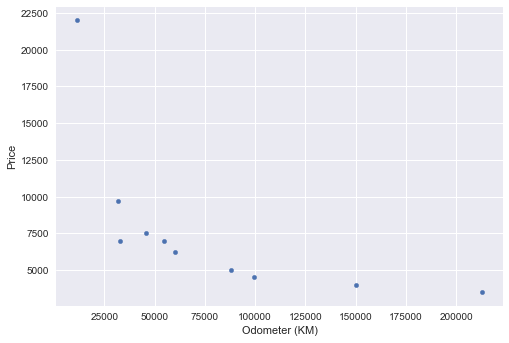

In [126]:
plt.style.use('seaborn')

car_sales.plot(x='Odometer (KM)',
                                y='Price',
                                kind='scatter');

In [130]:
x = np.random.randn(10,4)
x

array([[ 1.21665116,  0.28851867,  1.39424236, -1.40435996],
       [-0.86754877,  0.69966101, -1.08955539, -1.20401729],
       [ 0.83633079, -0.94634359, -0.42023756, -0.71442612],
       [ 0.22183029, -0.6780337 , -0.20671655,  0.61673769],
       [ 0.02592989, -0.45512002,  1.52438732, -1.66871054],
       [ 1.40774382,  1.2753884 ,  1.26633743, -0.06312141],
       [ 0.87924794,  0.12300288, -0.15758108, -2.11544426],
       [ 2.00049439, -0.06115756, -0.87443136, -0.42807611],
       [ 1.18281591, -1.05027882, -0.73230281, -0.64909025],
       [ 1.39293071,  1.49111456,  0.35395118,  0.27783345]])

In [131]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,1.216651,0.288519,1.394242,-1.404360
1,-0.867549,0.699661,-1.089555,-1.204017
2,0.836331,-0.946344,-0.420238,-0.714426
3,0.221830,-0.678034,-0.206717,0.616738
4,0.025930,-0.455120,1.524387,-1.668711
5,1.407744,1.275388,1.266337,-0.063121
6,0.879248,0.123003,-0.157581,-2.115444
7,2.000494,-0.061158,-0.874431,-0.428076
8,1.182816,-1.050279,-0.732303,-0.649090
9,1.392931,1.491115,0.353951,0.277833


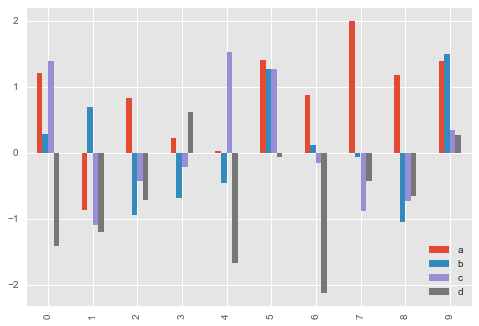

In [133]:
plt.style.use('ggplot')
ax = df.plot(kind='bar');

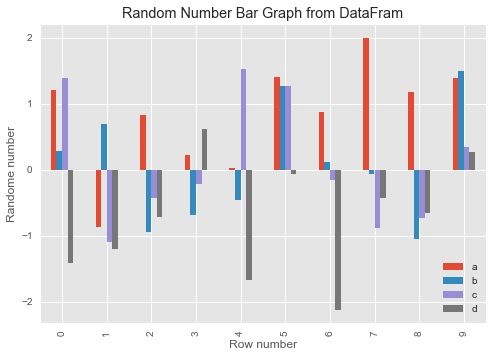

In [138]:
ax = df.plot(kind='bar');
ax.set(title='Random Number Bar Graph from DataFram',
       xlabel='Row number',
       ylabel='Randome number')

ax.legend().set_visible(True);

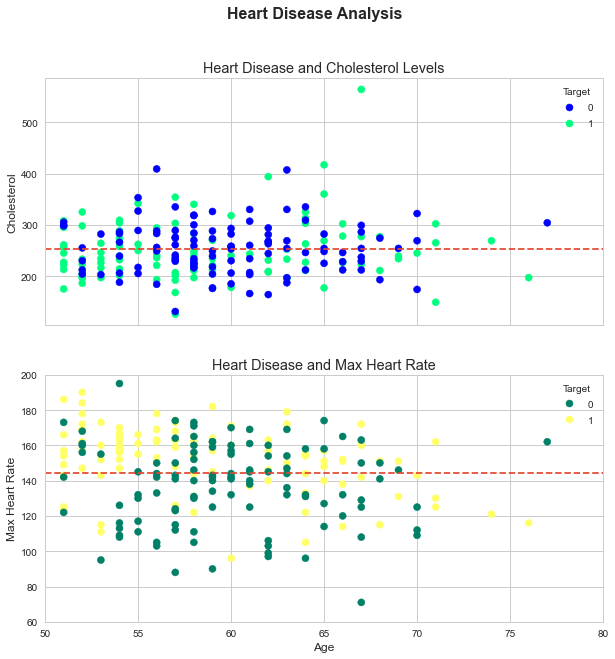

In [145]:
plt.style.use('seaborn-whitegrid')
fig,(ax0,ax1) = plt.subplots(figsize=(10,10),
                             nrows=2,
                             ncols=1,
                             sharex=True)

# age vs cholesterol
scatter1 = ax0.scatter(x=over_50['age'],
            y=over_50['chol'],
            c=over_50['target'],
            cmap='winter');

ax0.set(title='Heart Disease and Cholesterol Levels',
        ylabel='Cholesterol')
ax0.set_xlim([50,80])

ax0.legend(*scatter1.legend_elements(),title='Target')
ax0.axhline(y=over_50['chol'].mean(),
            linestyle='--');

# age vs
scatter2= ax1.scatter(x=over_50['age'],
                      y=over_50['thalach'],
                      c=over_50['target'],
                      cmap='summer')

ax1.set(title='Heart Disease and Max Heart Rate',
        xlabel='Age',
        ylabel='Max Heart Rate')
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

ax1.legend(*scatter2.legend_elements(), title='Target');
ax1.axhline(y=over_50['thalach'].mean(),
            linestyle='--');

fig.suptitle('Heart Disease Analysis', fontsize=16,fontweight='bold');

In [146]:
fig.savefig('heart-disease-analysis.png');